In [2]:
!pip install -U kaleido
!pip install -U plotly
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import display, Image


[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 1.0 MB/s eta 0:00:0000:0100:01m

[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


# 1. Implementation of the algorithms

In [34]:
# Gradient descent with momentum optimization for 2 dimensions

def grad_descent_momentum(grad,lr,beta,prev,epsilon):
  sequence = [prev]
  v = (1 - beta) * np.array(grad(prev[0],prev[1]))
  cur = np.array(prev) - lr * v
  i=0
  sequence.append(cur)

  while abs(prev[0]-cur[0]) > epsilon and abs(prev[1]-cur[1])>epsilon:
    prev = cur
    v = beta * v +(1 - beta) * np.array(grad(prev[0],prev[1]))
    cur = np.array(prev) - lr * v
    i+=1
    sequence.append(cur)

  return (cur, sequence, i)

In [65]:
# ADAM optimization for 2 dimensions

def adam(grad,lr,beta1,beta2,prev,epsilon):
  sequence = [prev]

  v = (1 - beta1) * np.array(grad(prev[0],prev[1]))
  s = (1 - beta2) * np.array(grad(prev[0],prev[1]))**2
  vcor = v/(1-beta1)
  scor = s/(1-beta2)
  cur = np.array(prev) - lr * vcor /(np.sqrt(scor)+epsilon)
  i=0
  sequence.append(cur)

  while abs(prev[0]-cur[0]) > epsilon and abs(prev[1]-cur[1]) > epsilon:
    prev = cur
    v = beta1 * v +(1 - beta1) * np.array(grad(prev[0],prev[1]))
    s = beta2 * s +(1 - beta2) * np.array(grad(prev[0],prev[1]))**2
    vcor = v/(1-beta1)
    scor = s/(1-beta2)
    cur = np.array(prev) - lr * vcor /(np.sqrt(scor)+epsilon)
    i+=1
    sequence.append(cur)

  return (cur, sequence, i)

# 2. Implementing the algorithms on the arbitrary functions

In [58]:
# Defining the function and its gradient
func = lambda x,y: x**2 + y**2 + np.sin(x) + np.cos(y) + x + y
grad = lambda x,y: [2*x + np.cos(x) + 1, 2*y - np.sin(y) +  1]

In [66]:
# Apply gradient descent 4 1
grad_output = grad_descent_momentum(grad, prev=[4,1], lr = 0.05, beta = 0.9, epsilon = 1e-6)
history_gd = grad_output[1]

print('Minimum x-value from gradient descent: %s' %grad_output[0])
print('Minimal value of the func: ',func(grad_output[0][0],grad_output[0][1]))
print('Iterations: %s' %grad_output[2])

Minimum x-value from gradient descent: [-0.83652424 -0.8886161 ]
Minimal value of the func:  -0.3475608356691561
Iterations: 147


In [67]:
# Apply ADAM
adam_output = adam(grad, prev = [4,1], lr = 0.05, beta1 = 0.9,beta2 = 0.999, epsilon = 1e-6)
history_adam = adam_output[1]

print('Minimum x-value from gradient descent: %s' %adam_output[0])
print('Minimal value of the func: ',func(adam_output[0][0],adam_output[0][1]))
print('Iterations: %s' %adam_output[2])

Minimum x-value from gradient descent: [-0.84628081 -0.88640061]
Minimal value of the func:  -0.3473998536835714
Iterations: 131


# 3. Illustration of the process

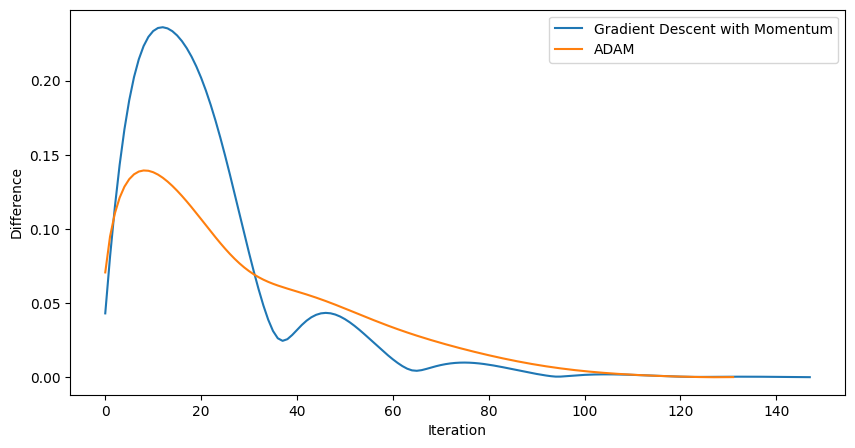

In [74]:
# Calculate difference between successive points
# Using Euclidean distance
diff_curr_gd = [np.sqrt((history_gd[i+1][0]-history_gd[i][0])**2 + (history_gd[i+1][1]-history_gd[i][1])**2)\
                for i in range(len(history_gd)-1)]
diff_prev_gd = [np.sqrt((history_gd[i][0]-history_gd[i-1][0])**2 + (history_gd[i][1]-history_gd[i-1][1])**2)\
                for i in range(1, len(history_gd))]

diff_curr_adam = [np.sqrt((history_adam[i+1][0]-history_adam[i][0])**2 + (history_adam[i+1][1]-history_adam[i][1])**2)\
                  for i in range(len(history_adam)-1)]
diff_prev_adam = [np.sqrt((history_adam[i][0]-history_adam[i-1][0])**2 + (history_adam[i][1]-history_adam[i-1][1])**2)\
                  for i in range(1, len(history_adam))]

# Plot
plt.figure(figsize=(10,5))
plt.plot(diff_curr_gd, label="Gradient Descent with Momentum")
plt.plot(diff_curr_adam, label="ADAM")
plt.xlabel("Iteration")
plt.ylabel("Difference")
plt.legend()
plt.show()

In [69]:
def road_to_min_plot(f, x_range, y_range, x_seq, y_seq, Algorithm):
    X, Y = np.meshgrid(x_range, y_range)
    Z = f(X, Y)

    fig = go.Figure(data=go.Contour(z=Z, x=x_range, y=y_range, contours_coloring="lines"))
    fig.add_trace(go.Scatter(x=x_seq, y=y_seq, mode='lines+markers', line=dict(color="blue")))
    fig.update_layout(title_text = Algorithm, xaxis_title='x', yaxis_title='y', width=800, height=500)
    #fig.show()

    #This modifications had to be made because github won't allow to show interactive plots
    png_bytes = pio.to_image(fig, format="png")
    display(Image(png_bytes))

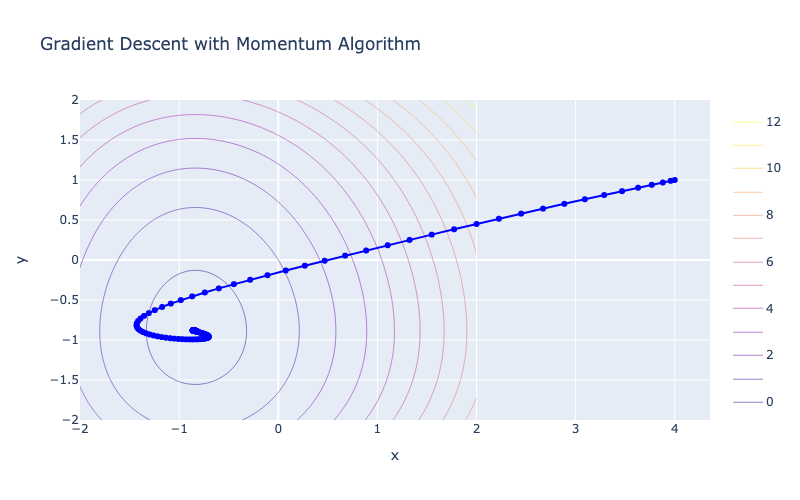

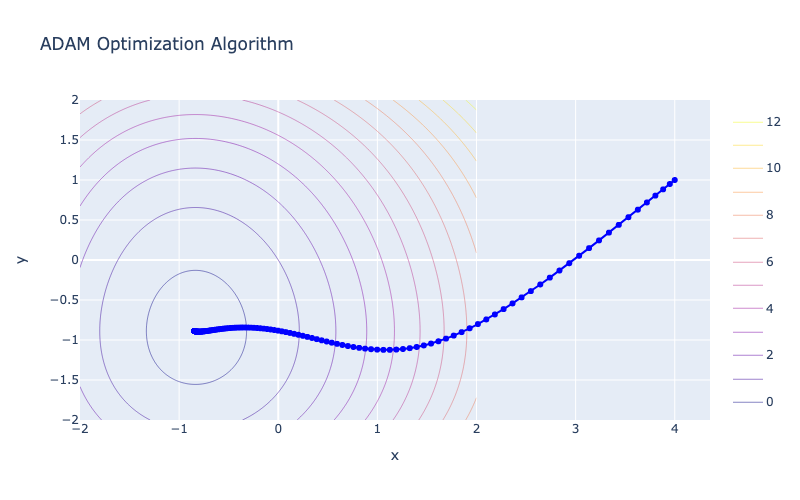

In [76]:
# Set range for x and y for visualization
x_range = np.linspace(-2, 2, 400)
y_range = np.linspace(-2, 2, 400)

# Gradient Descent with Momentum
history_gd_x = [item[0] for item in history_gd]
history_gd_y = [item[1] for item in history_gd]
history_adam_x = [item[0] for item in history_adam]
history_adam_y = [item[1] for item in history_adam]

road_to_min_plot(func, x_range, y_range, history_gd_x, history_gd_y, "Gradient Descent with Momentum Algorithm")
road_to_min_plot(func, x_range, y_range, history_adam_x, history_adam_y, "ADAM Optimization Algorithm")

# 4. Conclusion